# Анализ источников новостей

Цель данного исследования: проанализировать источники новостных лент, сравнить рубрики, подумать над возможностью добавление\удаление категорий для проекта "Радар новостей рунета"

In [4]:
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt

In [1]:
from nltk import wordpunct_tokenize
from nltk import FreqDist

## ria

In [5]:
dateparse = lambda x: pd.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

In [6]:
data_ria = pd.read_csv('../data/ria.csv',
                      sep=',',
                      index_col=False,
                      escapechar='\\',
                      parse_dates=['date'],
                      date_parser=dateparse,
                      quotechar='\"', error_bad_lines=False)

b'Skipping line 49866: expected 17 fields, saw 33\n'


In [7]:
# Проверим преобразование
data_ria.dtypes

date           datetime64[ns]
url                    object
edition                object
topics                 object
authors               float64
title                  object
text                   object
reposts_fb             object
reposts_vk             object
reposts_ok             object
reposts_twi            object
reposts_lj             object
reposts_tg             object
likes                   int64
views                   int64
comm_count             object
dtype: object

In [8]:
data_ria.shape

(101543, 16)

In [9]:
# Так выглядет датасет ria
data_ria.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count
0,2019-08-10 06:35:00,https://ria.ru/20190810/1557366973.html,ria.ru,Происшествия,NaN,Восемнадцать туристов застряли на пляже в Прим...,"ВЛАДИВОСТОК, 10 авг – РИА Новости.nВосемнадцат...",-,-,-,-,-,-,0,70,-
1,2019-08-10 03:25:00,https://ria.ru/20190810/1557366343.html,ria.ru,В мире,NaN,Президент Парагвая даст показания по делу о сп...,"БУЭНОС-АЙРЕС, 10 авг – РИА Новости.nПрезидент ...",-,-,-,-,-,-,1,177,-
2,2019-08-10 03:26:00,https://ria.ru/20190810/1557366366.html,ria.ru,В мире,NaN,Андрейченко обвинили в угрозе теракта после но...,"МОСКВА, 10 авг - РИА Новости.nДмитрию Андрейче...",-,-,-,-,-,-,2,919,-
3,2019-08-10 03:31:00,https://ria.ru/20190810/1557366398.html,ria.ru,В мире,NaN,"Япония заявила, что не испугалась субботних пу...","МОСКВА, 10 авг - РИА Новости.nПравительство Яп...",-,-,-,-,-,-,1,140,-
4,2019-08-10 03:32:00,https://ria.ru/20190810/1557366421.html,ria.ru,Происшествия,NaN,"Власти Якутии погасят долг перед жителями, уча...","ЯКУТСК, 10 авг – РИА Новости.nСредства резервн...",-,-,-,-,-,-,3,1196,-


In [10]:
# Выясним в каким столбцах есть пустые данные
data_ria.isnull().any()

date           False
url            False
edition        False
topics         False
authors         True
title          False
text            True
reposts_fb     False
reposts_vk     False
reposts_ok     False
reposts_twi    False
reposts_lj     False
reposts_tg     False
likes          False
views          False
comm_count     False
dtype: bool

In [11]:
print('Кол-во строк с значением NaN в столбце "Text" = ', data_ria['text'].isnull().sum())
data_ria[data_ria['text'].isnull()]

Кол-во строк с значением NaN в столбце "Text" =  2


,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count
45983,2019-02-26 14:22:00,https://ria.ru/20190226/1551377894.html,ria.ru,Общество,NaN,Самый красивый трамвайный маршрут России,NaN,-,-,-,-,-,-,3,1140,-
97961,2019-07-29 16:15:00,https://ria.ru/20190729/1556918528.html,ria.ru,Безопасность,NaN,Крылья России. Самолёты ОКБ Сухого,NaN,-,-,-,-,-,-,43,1383,-


In [12]:
#Удалим эти строки
data_ria.drop(data_ria[data_ria.text.isnull()].index, inplace=True)

In [13]:
print('Кол-во строк с значением NaN в столбце "Text" = ', data_ria['text'].isnull().sum())

Кол-во строк с значением NaN в столбце "Text" =  0


Посмотрим сколько элементов Nan в столбце авторов

In [14]:
print('Кол-во строк с значением NaN в столбце "authors" = ', data_ria['authors'].isnull().sum())

Кол-во строк с значением NaN в столбце "authors" =  101541


Как видим все значения авторов Nan. Можно не использовать данные столбец

Посмотрим, что в столбцах, которые содержат дефис, как обозначение пустых данных

In [15]:
print('edition: ',data_ria['edition'].unique())
print('reposts_fb: ', data_ria['reposts_fb'].unique())
print('reposts_vk: ',data_ria['reposts_vk'].unique())
print('reposts_ok: ',data_ria['reposts_ok'].unique())
print('reposts_twi: ',data_ria['reposts_twi'].unique())
print('reposts_lj: ',data_ria['reposts_lj'].unique())
print('reposts_tg: ',data_ria['reposts_tg'].unique())
print('likes: ',data_ria['likes'].unique())
print('views: ',data_ria['views'].unique())
print('comm_count: ',data_ria['comm_count'].unique())

edition:  ['ria.ru']
reposts_fb:  ['-']
reposts_vk:  ['-']
reposts_ok:  ['-']
reposts_twi:  ['-']
reposts_lj:  ['-']
reposts_tg:  ['-']
likes:  [    0     1     2     3    14    63    19     5    16   151     6    11
     4    29    13   184     8     7    10    30    28    18   108    95
   239    36    24   333   257    51    39     9    88    77    27    46
    12    70    23    22    34    67   100   421   256   381   318    33
    55   141    32   189    64    15   619    45    20   165    54   646
    82   160    81   250   216    17    50    31    47   161   366    75
   114    25   245   434    53    21   392   109   628   674   835   133
   402    43    59    52    26   113   219   474    74   289    83   397
   375    68   315    56   564   128   356    80    49   106   195  1043
   111    94    73   755   238   470    84    69   607   115   139    57
   145    62    35   155    44    37    60    79   263    71   362   104
    42   231    58  1502    99  1971   188   267   66

В edition, likes и views данные есть, остальные можно удалять

In [62]:
#  Проверим повторяющиеся тексты
print('Кол-во одинаковых текстов:',data_ria.text.duplicated().sum())

Кол-во одинаковых текстов: 36


In [63]:
data_ria = data_ria.drop_duplicates(subset='text')

In [64]:
data_ria.shape

(101505, 18)

### Анализ дат

In [65]:
print('Минимальная дата в датасете:', data_ria.date.min())
print('Максимальная дата в датасете:', data_ria.date.max())

Минимальная дата в датасете: 2018-12-05 14:29:00
Максимальная дата в датасете: 2019-08-10 06:35:00


#### Распределение количества новостей по месяцам

In [66]:
# Вынесем месяц и год новости в отдельные столбцы
data_ria['month'] = data_ria.date.apply(lambda x: x.month)
data_ria['year'] = data_ria.date.apply(lambda x: x.year)

# Создадим отдельный датасет посчитаем количество новостей в разрезе месяца и года
df = data_ria.groupby(['year', 'month']).text.nunique().reset_index()

In [67]:
df

,year,month,text
0,2018,12,11329
1,2019,1,13180
2,2019,2,11096
3,2019,3,10512
4,2019,4,13064
5,2019,5,11423
6,2019,6,13065
7,2019,7,13906
8,2019,8,3930


In [68]:
df['month_year'] = df[['month', 'year']].apply(lambda x: '-'.join(['0'+str(x.month) if x.month<10 else str(x.month),
                                                                  str(x.year)]),
                                               axis =1)

In [69]:
df.columns = ['year', 'month', 'nunique_text', 'month_year']

In [70]:
# выберем только те месяцы, в которых количество новостей больше 10
df = df[df.nunique_text>10]

In [71]:
df[['month_year', 'nunique_text']].sort_values('nunique_text', ascending = False)

,month_year,nunique_text
7,07-2019,13906
1,01-2019,13180
6,06-2019,13065
4,04-2019,13064
5,05-2019,11423
0,12-2018,11329
2,02-2019,11096
3,03-2019,10512
8,08-2019,3930


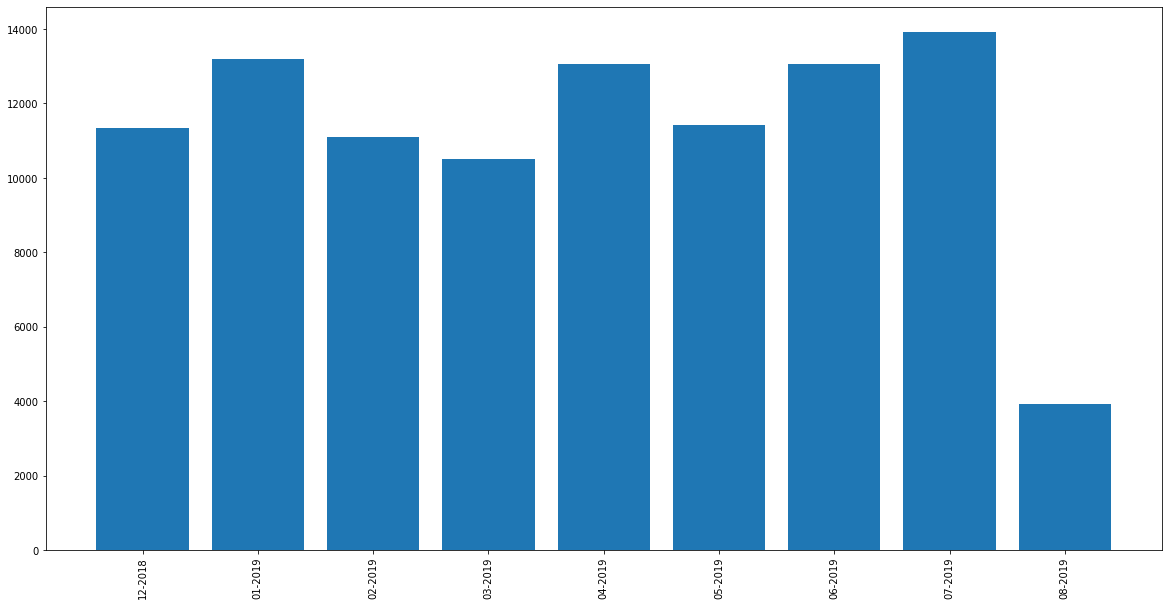

In [72]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = df.month_year,
        height = df.nunique_text.values)
plt.xticks(rotation='vertical')
plt.show()

In [25]:
import re

In [73]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\«", "", x))

In [74]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\»", "", x))

In [75]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\%", "", x))

In [76]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\,", "", x))

In [77]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\.", "", x))

In [78]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\—", "", x))

In [79]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\-", "", x))

In [80]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\:", "", x))

In [81]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\n", "", x))

In [82]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\/", "", x))

In [83]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\?", "", x))

In [84]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\)", "", x))

In [85]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\(", "", x))

In [86]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\"", "", x))

In [87]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\''", "", x))

In [88]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\'", "", x))

In [89]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\#", "", x))

In [90]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\;", "", x))

In [91]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\@", "", x))

In [92]:
data_ria.text = data_ria.text.apply(lambda x: re.sub("\–", "", x))

In [46]:
def text_to_token(text):
    text = text.lower()
    return wordpunct_tokenize(text)

In [47]:
def data_withoun_stopwords(text):
    text = [token for token in text if token not in stopwords]
    return text

In [93]:
dictionary_with_stopwords = FreqDist()

In [94]:
dictionary_without_stopwords = FreqDist()

In [95]:
for token in data_ria.text.values:
    dictionary_with_stopwords.update(text_to_token(token))

In [52]:
stopwords = open('../nlp/preprocessing/stopwords.txt', 'r')
stopwords = stopwords.read().split('\n')
stopwords += ["c","а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видел","видеть","вместе","вне","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","все еще","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делал","делать","делаю","дело","день","деньги","десятый","десять","для","до","довольно","долго","должен","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","иди","идти","из","или","им","имеет","имел","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может","может быть","можно","можхо","мои","мой","мор","москва","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ним","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","откуда","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подойди","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","путь","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","с кем","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотел бы","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я","являюсь"]

In [96]:
for token in data_ria.text.values:
    dictionary_without_stopwords.update(data_withoun_stopwords(text_to_token(token)))

In [97]:
# Посмотрим 20 самых популярных слов без удаления стопслов и построим по ним график
dictionary_with_stopwords.most_common(20)

[('в', 828717),
 ('и', 430548),
 ('на', 319834),
 ('что', 221287),
 ('с', 191804),
 ('по', 184939),
 ('не', 141774),
 ('риа', 135851),
 ('о', 88570),
 ('из', 82905),
 ('к', 68388),
 ('для', 68387),
 ('его', 61122),
 ('за', 59753),
 ('москва', 59146),
 ('а', 55839),
 ('года', 55012),
 ('от', 54302),
 ('как', 49349),
 ('также', 49147)]

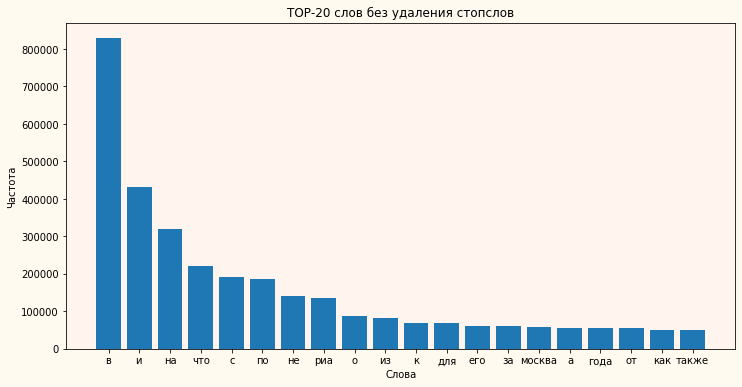

In [98]:
x = dict(dictionary_with_stopwords.most_common(20)).keys()
y = dict(dictionary_with_stopwords.most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

In [99]:
# Посмотрим 20 самых популярных слов после удаления стопслов и построим по ним график
dictionary_without_stopwords.most_common(20)

[('риа', 135851),
 ('россии', 48372),
 ('сша', 44405),
 ('рф', 43725),
 ('заявил', 43247),
 ('новости', 37835),
 ('новостиn', 34632),
 ('словам', 28215),
 ('украины', 26949),
 ('сообщил', 25940),
 ('данным', 25891),
 ('президента', 24129),
 ('говорится', 21743),
 ('области', 19379),
 ('мая', 19172),
 ('страны', 18344),
 ('отметил', 17992),
 ('глава', 16287),
 ('изза', 15825),
 ('сообщает', 14961)]

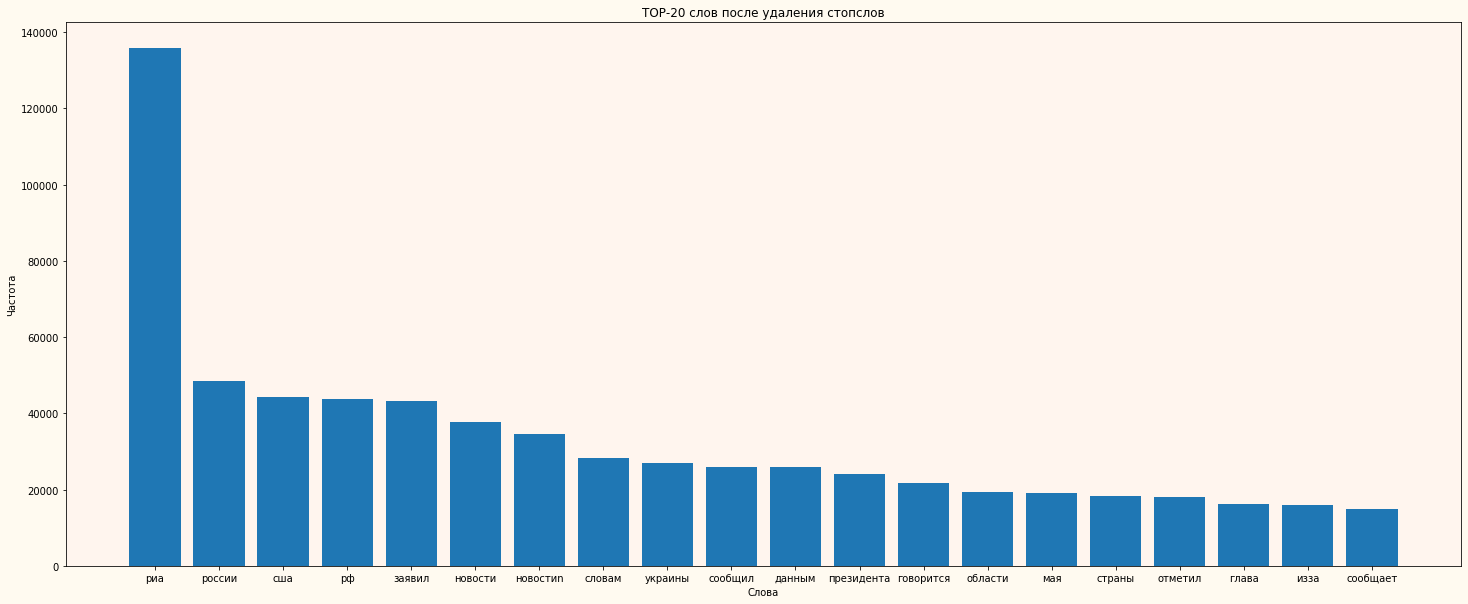

In [100]:
x = dict(dictionary_without_stopwords.most_common(20)).keys()
y = dict(dictionary_without_stopwords.most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов после удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(25)    #  ширина Figure
fig.set_figheight(10)    #  высота Figure


plt.show()

### Рубрики Ria

In [16]:
# Считаем количество рубрик в датасете Ria, а также выведем значения
print('Количество рубрик = ', data_ria.topics.unique().shape)
data_ria['topics'].unique()

Количество рубрик =  (1120,)


array(['Происшествия', 'В мире', 'Экономика', ...,
       'ЧП на военном складе в Красноярском крае', 'Лиссабон (город)',
       'The Guardian'], dtype=object)

In [16]:
data_ria.groupby('topics')['topics'].count()

topics
2 февраля - день сурка      1
BAFTA                       1
BBC                         8
Cirque du Soleil            1
Comedy Club Production      1
                         ... 
пассажиры                   1
психология                  1
религия                   192
самолеты                    2
туристы                    21
Name: topics, Length: 1120, dtype: int64

Тут надо разбираться, все ли рубрики нам нужны